# Object Detection


![](https://i0.wp.com/miro.medium.com/max/875/0*-cQJQHHUcUBb8V5-.png?zoom=2&w=578&ssl=1)

## R-CNN

![](https://miro.medium.com/max/1400/1*REPHY47zAyzgbNKC6zlvBQ.png)



Selective Search:
1. Generate initial sub-segmentation, we generate many candidate     regions
2. Use greedy algorithm to recursively combine similar regions into larger ones 
3. Use the generated regions to produce the final candidate region proposals 

Problems with R-CNN
 * It still takes a huge amount of time to train the network as you would have to classify 2000 region proposals per image.
 * It cannot be implemented real time as it takes around 47 seconds for each test image.
 * The selective search algorithm is a fixed algorithm. Therefore, no learning is happening at that stage. This could lead to the generation of bad candidate region proposals.


## Fast R-CNN
![](https://miro.medium.com/max/1400/1*0pMP3aY8blSpva5tvWbnKA.png)


## Faster R-CNN
Good tutorial
https://blog.paperspace.com/faster-r-cnn-explained-object-detection/


![](https://blog.paperspace.com/content/images/2020/09/Fig05-2.jpg)



![](https://tryolabs.imgix.net/assets/blog/2018-01-18-faster-r-cnn-down-the-rabbit-hole-of-modern-object-detection/fasterrcnn-architecture-b9035cba50.png)

Region Proposal Network (RPN), and anchor boxes in various scales and aspect ratios. [74]

![](https://www.researchgate.net/publication/358423469/figure/fig5/AS:1121050834280451@1644290755793/Region-Proposal-Network-RPN-and-anchor-boxes-in-various-scales-and-aspect-ratios-74.jpg)

In [ ]:
import os

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import transforms
from torchvision import models

from skimage import data

from PIL import Image

from tqdm.notebook import trange, tqdm

from sklearn.model_selection import train_test_split

In [ ]:
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth


  0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
coco_class = ["", "person", "bicycle", "car", "motorcycle", "airplane", "bus", 
  "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign",
  "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep",
  "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
  "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball"
  "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
  "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon",
  "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot"
  "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant"
  "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote",
  "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", 
  "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
  "hair drier", "toothbrush"
]

In [ ]:
from io import BytesIO
import requests

image_url = "https://djl.ai/examples/src/test/resources/dog_bike_car.jpg"

response = requests.get(image_url)

original = Image.open(BytesIO(response.content))

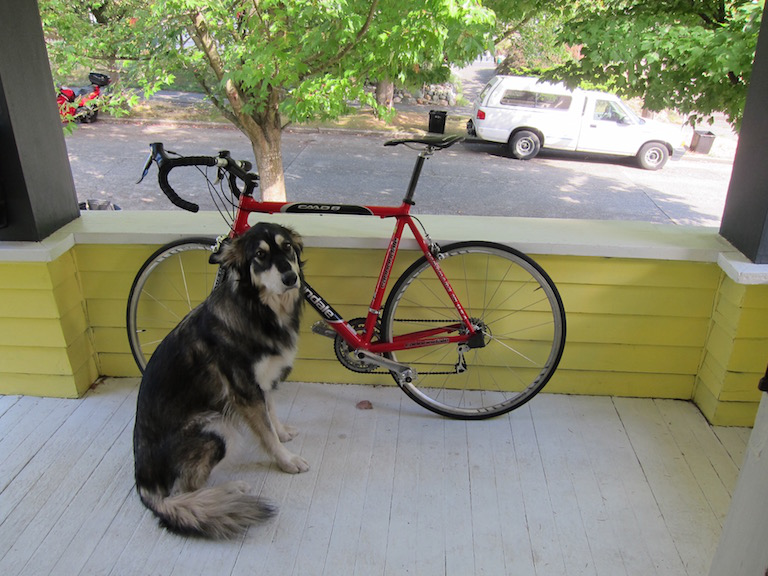

In [ ]:
original

In [ ]:
from PIL import Image, ImageDraw, ImageFont

def show_boxes(x, boxes, labels, class_names):
    img = transforms.ToPILImage()(x)

    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()

    sz = len(boxes)
    for i in range(sz):
        box = boxes[i]
        draw.rectangle(xy=box.numpy(), outline=(0,0,255))

        label = class_names[labels[i]]

        text_size = font.getsize(label)
        text_location = [box[0] + 2., box[1] - text_size[1]]
    
        draw.text(xy=text_location, text=label, fill='blue',
                  font=font)
    return img

In [ ]:
inputs = [weights.transforms()(original)]

In [ ]:
model.eval()

with torch.no_grad():
  predictions = model(inputs)   

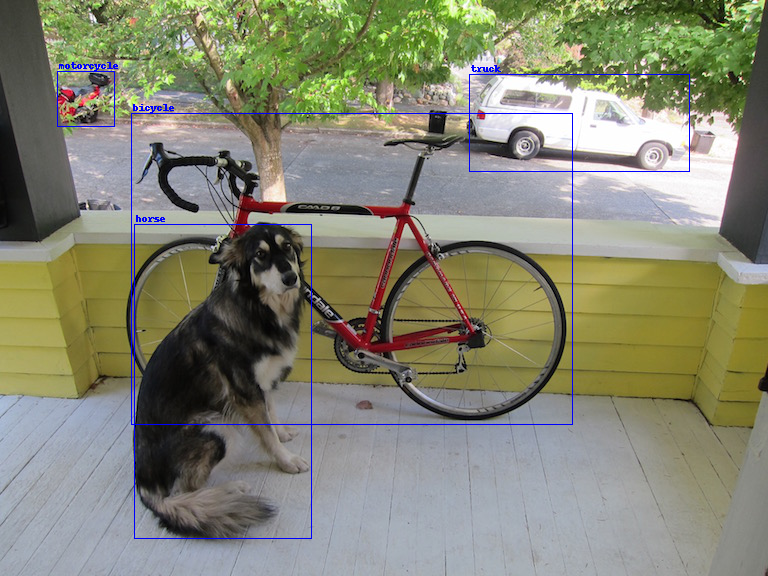

In [ ]:
show_boxes(inputs[0], predictions[0]['boxes'], predictions[0]['labels'], coco_class)

## Metrics
![](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60edcdba3ff653819a152b0b_sjpuu8ft_165kxIhdSZSO0glxkVdTuenIxo44QQL6K2I5xbhFfTqftjaK66BblyNCIxm9X5gppWCh0JgsMu-2trIKgC-_wjT9R2aDdOEbH3F5aE2Ncf6O6Y64E9bPe1bbRCOGBjZ.png)

$ IoU = \frac{area(B_p \cap B_{gt})}{area(B_p \cup B_{gt})} \quad $

## Average presigion / Average recall

TODO

## Mean average recall

Mean average recall is defined as the mean of AR across all K classes:

$ mAR = \frac{\sum_{i = 1}^{K}{AR_i}}{K} $

# Training Faster R-CCN

In [ ]:
! pip install -q kaggle

In [ ]:
# files.upload()

In [ ]:
api_token = {"username":"USERNAME","key":"API_KEY"}

import json
import zipfile
import os
os.makedirs('/root/.kaggle', exist_ok=True)
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [ ]:
! chmod 600 /root/.kaggle/kaggle.json
! kaggle datasets download -d andy8744/playing-cards-object-detection-dataset

 97% 656M/674M [00:02<00:00, 250MB/s]
100% 674M/674M [00:02<00:00, 296MB/s]


In [ ]:
!unzip -n -q /content/playing-cards-object-detection-dataset.zip

In [ ]:
!ls /content/

data.yaml				    README.roboflow.txt  train
kaggle_data.yaml			    sample_data		 valid
playing-cards-object-detection-dataset.zip  test


In [ ]:
!ls /content/train/images | head

000090528_jpg.rf.d50e89610e5c97c61632c290692f3e75.jpg
000233645_jpg.rf.843259f9e28b9e485f219f8bfa2c5cdf.jpg
000452673_jpg.rf.691b39608109cde124380edb13c2a485.jpg
000554394_jpg.rf.8be18f32226fb0d2208dddd4349077ba.jpg
000609988_jpg.rf.53fdbac0baabace7c9ca457daac7e960.jpg
000618838_jpg.rf.e1a6260c04b2e44c95c94280963812d6.jpg
000807742_jpg.rf.6730af8a9604c80ade38ded7a5f7cec3.jpg
000868268_jpg.rf.154d4050602f82b6017f95afaa8022e5.jpg
000898488_jpg.rf.7f8eceb05724a0fdbc591ac1872126e3.jpg
000933090_jpg.rf.4b7900a612be70d47dae80ffab16a667.jpg


Labels files contains information about boxes and classes

In [ ]:
!ls /content/train/labels | head

000090528_jpg.rf.d50e89610e5c97c61632c290692f3e75.txt
000233645_jpg.rf.843259f9e28b9e485f219f8bfa2c5cdf.txt
000452673_jpg.rf.691b39608109cde124380edb13c2a485.txt
000554394_jpg.rf.8be18f32226fb0d2208dddd4349077ba.txt
000609988_jpg.rf.53fdbac0baabace7c9ca457daac7e960.txt
000618838_jpg.rf.e1a6260c04b2e44c95c94280963812d6.txt
000807742_jpg.rf.6730af8a9604c80ade38ded7a5f7cec3.txt
000868268_jpg.rf.154d4050602f82b6017f95afaa8022e5.txt
000898488_jpg.rf.7f8eceb05724a0fdbc591ac1872126e3.txt
000933090_jpg.rf.4b7900a612be70d47dae80ffab16a667.txt


In [ ]:
! cat /content/train/labels/000090528_jpg.rf.d50e89610e5c97c61632c290692f3e75.txt

51 0.46033653846153844 0.6935096153846154 0.06490384615384616 0.042067307692307696
37 0.6442307692307693 0.5012019230769231 0.06370192307692307 0.0889423076923077
37 0.6141826923076923 0.07451923076923077 0.06490384615384616 0.0889423076923077

In [ ]:
def read_annotations(file_path):
    boxes = []
    labels = []

    with open(file_path, "r") as f:
      for l in f:
        l = l[:-1]
        parts = l.split()
        labels.append(int(parts[0]))

        xc = float(parts[1])
        yc = float(parts[2])

        w = float(parts[3])
        h = float(parts[4])


        boxes.append((
            xc - w / 2, 
            yc - h / 2, 
            xc + w / 2, 
            yc + h / 2
        ))

    return boxes, labels

In [ ]:
read_annotations("/content/train/labels/000090528_jpg.rf.d50e89610e5c97c61632c290692f3e75.txt")

([(0.42788461538461536,
   0.6724759615384616,
   0.4927884615384615,
   0.7145432692307693),
  (0.6123798076923077,
   0.4567307692307693,
   0.6760817307692308,
   0.545673076923077),
  (0.5817307692307692,
   0.030048076923077267,
   0.6466346153846154,
   0.11899038461538428)],
 [51, 37, 37])

In [ ]:
img_names = [os.path.splitext(f)[0] for f in os.listdir("/content/train/images")]

In [ ]:
class_names = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', 
         '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', 
         '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', 
         '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', 
         '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 
         'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 
         'Qc', 'Qd', 'Qh', 'Qs']


class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, img_path, labels_path, img_size, transforms=None):
        self.transforms = transforms
        self.img_size = img_size
        self.img_path = img_path
        self.labels_path = labels_path
        self.img_names = [os.path.splitext(f)[0] for f in os.listdir(img_path)]
       
    def __getitem__(self, idx):
        image_name = self.img_names[idx]
        image_path = os.path.join(self.img_path, image_name + ".jpg")
        
        image = Image.open(image_path)
        image = transforms.Resize(self.img_size)(image)
                
        annot_filename = image_name + ".txt"
        annot_file_path = os.path.join(self.labels_path, annot_filename)
        
        boxes, labels = read_annotations(annot_file_path)
        
        num_objs = len(boxes)

        # bounding box to tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32) * self.img_size
        
        labels = torch.as_tensor(labels, dtype=torch.int64)
        
        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd
            
        return self.transforms(image), target

    def __len__(self):
        return len(self.img_names)

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = CustomDataset(
    "/content/train/images/",
    "/content/train/labels/",
    400,
    train_transform
)
    
def collate_fn(batch):
    return tuple(zip(*batch))

trainloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_fn
)

In [ ]:
inputs, targets = next(iter(trainloader))

In [ ]:
def rev_norm_image(x):
  std = torch.tensor([0.229, 0.224, 0.225]).unsqueeze(1).unsqueeze(2)
  mean = torch.tensor([0.485, 0.456, 0.406]).unsqueeze(1).unsqueeze(2)
  return x * std + mean


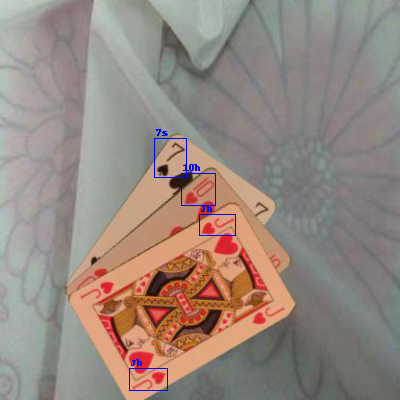

In [ ]:
show_boxes(rev_norm_image(inputs[0]), targets[0]['boxes'], targets[0]['labels'], class_names)

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")


num_classes = 1 + len(class_names)
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
inputs, target = next(iter(trainloader))

model(inputs, targets) 

{'loss_classifier': tensor(3.9992, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0102, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.5360, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0175, grad_fn=<DivBackward0>)}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), 0.001)

In [ ]:
model.train()

for e in range(1):
  running_loss = 0.0 
  i = 0
  for images, targets in tqdm(trainloader):
    # Move to default device
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    loss_dict = model(images, targets) 

    loss = torch.stack([loss for loss in loss_dict.values()]).sum()
  
    # Backward prop.
    optimizer.zero_grad()
    loss.backward()

    # Update model
    optimizer.step()

    running_loss += loss.cpu().item()
    if i % 50 == 49:   
      print(f'[{e+1}][{i + 1:5d}] loss: {running_loss / 50:.3f}')
      running_loss = 0.0
    i += 1

  0%|          | 0/3500 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
inputs, target = next(iter(trainloader))

In [ ]:
model_cpu = model.cpu()
# For inference
model_cpu.eval()

with torch.no_grad():
  predictions = model_cpu(inputs)  

In [ ]:
predictions[0]

# YOLO  

You Only Look Once

![](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/60d31e388536752a275673aa_machine-learning-infographic.jpg)

## YOLO history
The original YOLO (You Only Look Once) was written by Joseph Redmon in a custom framework called Darknet. Darknet is a very flexible research framework written in low level languages and has produced a series of the best realtime object detectors in computer vision:§
YOLO, YOLOv2, YOLOv3, YOLOv4, YOLOv5, YOLOV6, and now YOLOV7.

## YOLO algorithm

YOLO is based on the idea of segmenting an image into smaller images. The image is split into a square grid of dimensions S×S, like so:

![](https://miro.medium.com/max/754/0*hYdtgqequinVZd6y)



![](https://blog.paperspace.com/content/images/2018/04/yolo-5.png)



Box parametrization
![](https://blog.roboflow.com/content/images/2020/06/image-18.png)



![](https://miro.medium.com/max/1400/0*ejRHYHPQ9FNMzG1z)

## Non-Max suppression
Suppose N is the threshold and we have two lists A and B.Then for each class detected in image,

* Select the proposal with highest confidence score, remove it from A and add it to the final proposal list B. (Initially B is empty).
* Now compare this proposal with all the proposals by calculating the IOU (Intersection over Union) of this proposal with every other proposal. If the IOU is greater than the threshold N, remove that proposal from A.
* Again take the proposal with the highest confidence from the remaining proposals in A and remove it from A and add it to B.
* Once again calculate the IOU of this proposal with all the proposals in A and eliminate the boxes which have high IOU than threshold.
* This process is repeated until there are no more proposals left in A.


![](https://miro.medium.com/max/1400/1*6d_D0ySg-kOvfrzIRwHIiA.png)

# SSD 
SSD: Single Shot MultiBox Detector
Paper https://arxiv.org/abs/1512.02325

Goog tutorial https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection

![](https://miro.medium.com/max/1400/1*aex5im2aYcsk4RVKUD4zeg.jpeg)

# Backbone Network

We use ImageNet VGG-16 network for basic features.

![](https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection/raw/master/img/modifiedvgg.PNG)

# Auxiliary Convolutions

![](https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection/raw/master/img/auxconv.jpg)

We will now stack some more convolutional layers on top of our base network. These convolutions provide additional feature maps, each progressively smaller than the last.

In [ ]:
import torchvision

model = torchvision.models.detection.ssd300_vgg16(num_classes = 1 + len(class_names))

Downloading: "https://download.pytorch.org/models/vgg16_features-amdegroot-88682ab5.pth" to /root/.cache/torch/hub/checkpoints/vgg16_features-amdegroot-88682ab5.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
model

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = CustomDataset(
    "/content/train/images/",
    "/content/train/labels/",
    300,
    train_transform
)
    
def collate_fn(batch):
    return tuple(zip(*batch))

trainloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=8,
    shuffle=True,
    collate_fn=collate_fn
)

In [ ]:

# For Training
images,targets = next(iter(trainloader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images,targets)   # Returns losses and detections
        # Returns predictions

In [ ]:
output

{'bbox_regression': tensor(3.6432, grad_fn=<DivBackward0>),
 'classification': tensor(256.2302, grad_fn=<DivBackward0>)}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), 0.001)

In [ ]:
model.train()

for e in range(3):
  running_loss = 0.0 
  i = 0
  for images, targets in tqdm(trainloader):
    # Move to default device
    images = list(image.to(device) for image in images)
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

    loss_dict = model(images, targets) 

    loss = torch.stack([loss for loss in loss_dict.values()]).sum()
  
  
    # Backward prop.
    optimizer.zero_grad()
    loss.backward()

    # Update model
    optimizer.step()

    running_loss += loss.cpu().item()
    if i % 100 == 99:    
      print(f'[{e+1}][{i + 1:4d}] loss: {running_loss / 100:.3f}')
      running_loss = 0.0
    i += 1

  0%|          | 0/3500 [00:00<?, ?it/s]

[1][  100] loss: 2.392


KeyboardInterrupt: ignored

In [ ]:
inputs, target = next(iter(trainloader))

In [ ]:
model_cpu = model.cpu()
# For inference
model_cpu.eval()

with torch.no_grad():
  predictions = model_cpu(inputs)   

In [ ]:
predictions[0]["scores"]

In [ ]:
mask = predictions[0]["scores"] > predictions[0]["scores"][10]
mask

In [ ]:
boxes = predictions[0]['boxes'][mask]
labels = predictions[0]['labels'][mask]

In [ ]:
std = torch.tensor([0.229, 0.224, 0.225]).unsqueeze(1).unsqueeze(2)
mean = torch.tensor([0.485, 0.456, 0.406]).unsqueeze(1).unsqueeze(2)

In [ ]:
show_boxes(rev_norm_image(inputs[0]), boxes, labels, class_names)